<font color="#de3023"><h1><b>Welcome</b></h1></font>

#**Beginning with Data**



**Predicting Diagnosis: Working up to Logistic Regression**

- Approach 1: Linear Regression classifier

- Approach 2: Simple boundary classifier

- Approach 3: Modifying with logistic regression

- Approach 4: Multiple feature logistic regression

 Decision trees ML




# Background and data exploration

## Diagnosing cancer with biopsies


In [ ]:
#@title Run this to download your data! { display-mode: "form" }
# Load the data!
import pandas as pd
from sklearn import metrics


data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

Let's load the data

In [4]:
import os             # Good for navigating your computer's files
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [5]:

data_path = 'cancer.csv'

#make a dataframe
dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]

dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

# Exploring our data


 ## Looking at our dataset
We want to confirm that the size of our table is correct, check out the features present, and get a more visual sense of what it looks like overall.

##First Look at Data

In [6]:
dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [8]:
dataframe.shape

(569, 9)

Our colleague has given us documentation on what each feature column means. Specifically:

* <u><b><i>diagnosis</u></b></i>: Whether the tumor was diagnosed as malignant (1) or benign (0).
* <u><b><i>perimeter_mean</u></b></i>: The average perimeter of cells in that particular biopsy
* <u><b><i>radius_mean</u></b></i>: The average radius of cells in that particular biopsy
* <u><b><i>texture_mean</u></b></i>: The average texture of cells in that particular biopsy
* <u><b><i>area_mean</u></b></i>: The average area of cells in that particular biopsy
* <u><b><i>smoothness_mean</u></b></i>: The average smoothness of cells in that particular biopsy
* <u><b><i>concavity_mean</u></b></i>: The average concavity of cells in that particular biopsy
* <u><b><i>symmetry_mean</u></b></i>: The average symmetry of cells in that particular biopsy

Mean refers to taking an average (summing the values for each cell and dividing by the total number of cells observed in that biopsy).

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


 ## Visualizing our dataset



In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's focus on one feature for now: mean radius. How well does it predict diagnosis?

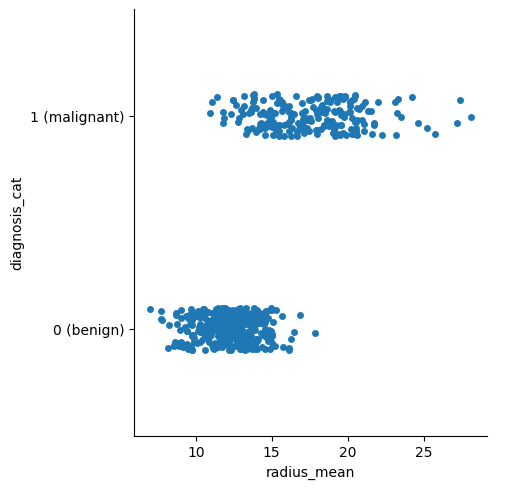

In [12]:
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])

Let's also make a fun boxplot, we can see outliers

<Axes: xlabel='perimeter_mean', ylabel='diagnosis_cat'>

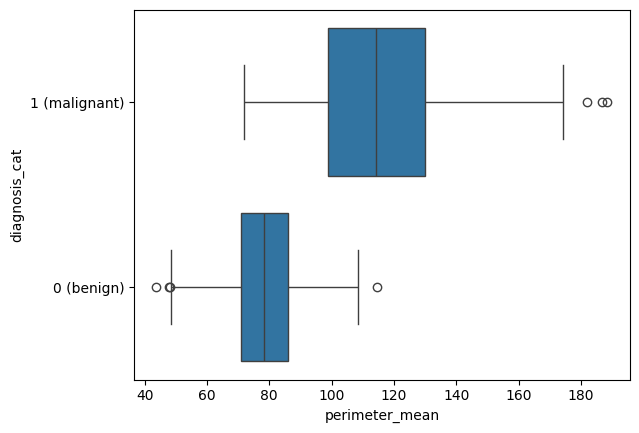

In [13]:
sns.boxplot(x = 'perimeter_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])

We can use simple Stats to check for outliers, just to make sure our data is not too variable

In [18]:
Q1 = dataframe['radius_mean'].quantile(0.25)
Q3 = dataframe['radius_mean'].quantile(0.75)
IQR = Q3 - Q1

outliers = dataframe[(dataframe['radius_mean'] < Q1 - 1.5 * IQR) | (dataframe['radius_mean'] > Q3 + 1.5 * IQR)]
print(outliers)

     diagnosis  perimeter_mean  radius_mean  texture_mean  area_mean  \
82           1           171.5        25.22         24.91     1878.0   
108          1           152.8        22.27         19.67     1509.0   
122          1           166.2        24.25         20.20     1761.0   
164          1           152.1        23.27         22.04     1686.0   
180          1           182.1        27.22         21.87     2250.0   
202          1           158.9        23.29         26.67     1685.0   
212          1           188.5        28.11         18.47     2499.0   
236          1           153.5        23.21         26.97     1670.0   
339          1           155.1        23.51         24.27     1747.0   
352          1           174.2        25.73         17.46     2010.0   
369          1           147.2        22.01         21.90     1482.0   
461          1           186.9        27.42         26.27     2501.0   
503          1           152.1        23.09         19.83     16

Let's start by predicting a diagnosis using a single feature: radius mean.


## Approach 1: Use Linear Regression




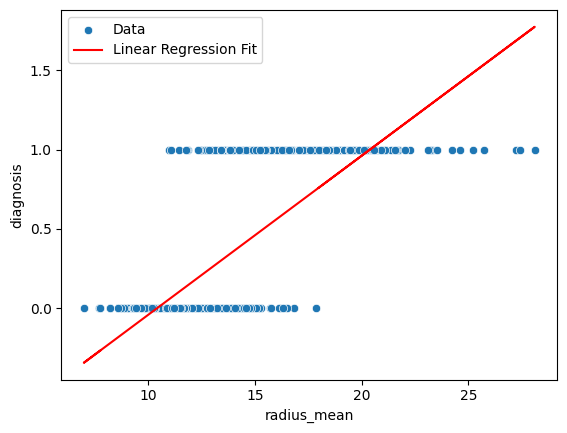

In [84]:
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend([ 'Data', 'Linear Regression Fit'])

### Linear Regression, does not work for this
 Only 0 and 1 are valid classifications. In this model the radius_mean would have to be 10 or 20 to be valid.

##Approach 2: Classification


### Classification is just drawing boundaries!

The simplest approach to classification is just drawing a boundary. Let's pick a boundary value for the radius mean and see how well it separates the data.

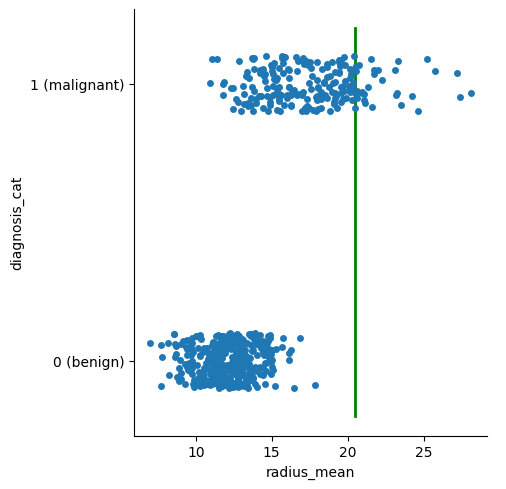

In [86]:
#@title Choose a value for your boundary line and click play!

target_boundary = 14.5 #@param {type:"slider", min:5, max:30, step:0.5}

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([target_boundary, target_boundary], [-.2, 1.2], 'g', linewidth = 2)

### Building the boundary classifier

Here we build a boundary classifier function that takes in a **target boundary**: a particular value of radius mean.


In [87]:
def boundary_classifier(target_boundary, radius_mean_series):
  predictions = []
  for radius_mean in radius_mean_series:
    if radius_mean > target_boundary:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions

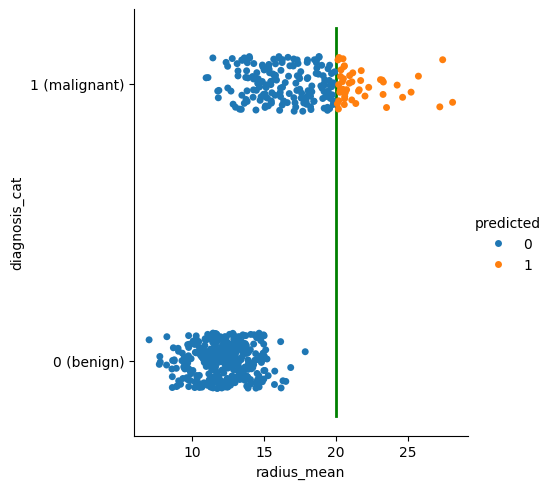

In [88]:
#@title Choose a value for your boundary line and click play to see your classifier at work!

#@markdown Double-click this cell to see the code for `y_pred` and `y_true`.
chosen_boundary = 20 #@param {type:"slider", min:5, max:30, step:0.5}

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

Checking Accuracy
We can take a look at `y_true` and `y_pred`

In [67]:
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

What is our accuracy?

In [89]:
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.7065026362038664


##Approach 3: Logistic Regression - using machine learning to determine the optimal boundary


Split the Data

In [90]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

Let's now take a look at the 'train' and 'test' groups:


In [91]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),0
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [92]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),0
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),0


### Single Variable Logistic Regression

We will use this to build a logistic regression model to predict the diagnosis using radius mean.

In [99]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


Now, let's prepare our model (we haven't trained it yet):

In [100]:
logreg_model = linear_model.LogisticRegression()

###Making Predictions

Next, we want to tell our `logreg_model` object to take in our inputs (X) and our true labels (y) and fit a line that predicts y from X.




In [101]:
logreg_model.fit(X_train, y_train)# ANSWER:


LogisticRegression()

### Testing our model



In [76]:
X_test = test_df[X]
y_test = test_df[y]

### Making predictions on our test set

Next, we need to figure out what our line thinks the diagnosis is based on our data points


#### ✍ Exercise

Fill in the appropriate input to this function and run the function below.

`y_pred = logreg_model.predict(FILL_ME_IN)`

In [102]:
y_pred = logreg_model.predict(X_test)


Run the code below to visualize the results!

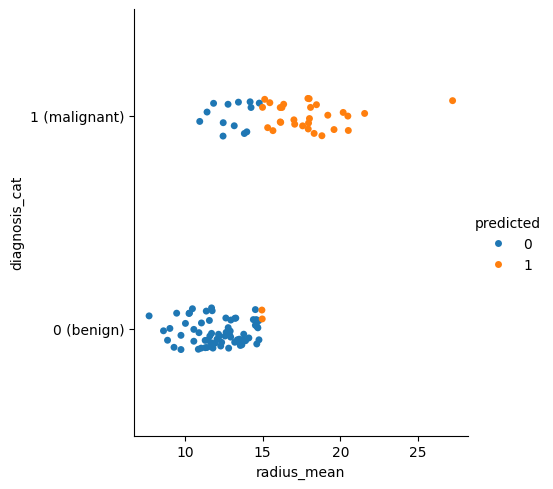

In [103]:
test_df['predicted'] = y_pred
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

It should perform better now

### Finally, let's evaluate the accuracy of our model.

In [104]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


##Soft Prob

<Axes: xlabel='radius_mean', ylabel='Predicted Probability'>

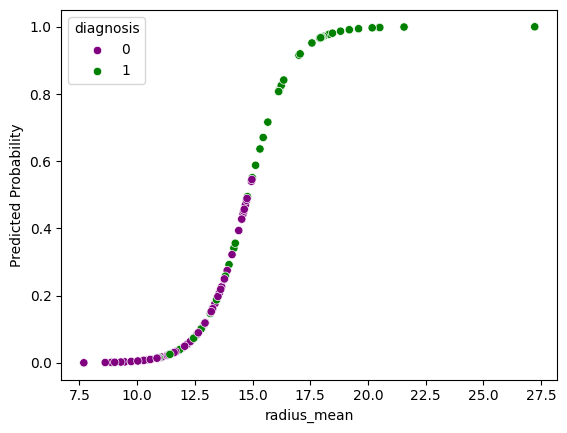

In [105]:

y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

###What does it mean?
To decide if the sample is 'malignant', it draws a 'decision boundary' where it thinks the sample is equally likely to be 'malignant' and 'normal', and asks 'am I to the left or the right of the boundary?'

# Approach 4: Multiple Feature Logistic Regression


What are our variables?

In [106]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),0


### Experimenting with Single-Variable Logistic Regression

In [110]:

X = ['radius_mean']
y = 'diagnosis'

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

X_train, X_test = train_df[X], test_df[X]
y_train, y_test = train_df[y], test_df[y]

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(X[0], accuracy)

radius_mean 0.868421052631579


### Note about Breast Cancer
Size of the Cell seems to be the best classifier, with radius_mean, and perimeter_mean working best


###Implementing Multi Variable

In [ ]:
dataframe.head(1)

### Logistic Regression with Multiple Features

Now, let's try re-fitting the model using more variables

In [111]:

X = ['perimeter_mean', 'radius_mean', 'texture_mean','area_mean']
y = 'diagnosis'

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

X_train, X_test = train_df[X], test_df[X]
y_train, y_test = train_df[y], test_df[y]

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(X)
print(accuracy)

['perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean']
0.8771929824561403


###Confusion Matrices


![Confusion Matrix](https://miro.medium.com/max/860/1*7EcPtd8DXu1ObPnZSukIdQ.png)

where the terms mean:

* **TP (True Positive)** = The model predicted positive (malignant in our case, since malignant has a label of 1) and it’s true.
* **TN (True Negative)** = The model predicted negative (benign in our case, since benign has a label of 0) and it’s true.
* **FP (False Positive)** = The model predicted positive and it’s false.
* **FN (False Negative)** = The model predicted negative and it’s false.

Text(0.5, 427.9555555555555, 'Predicted diagnosis')

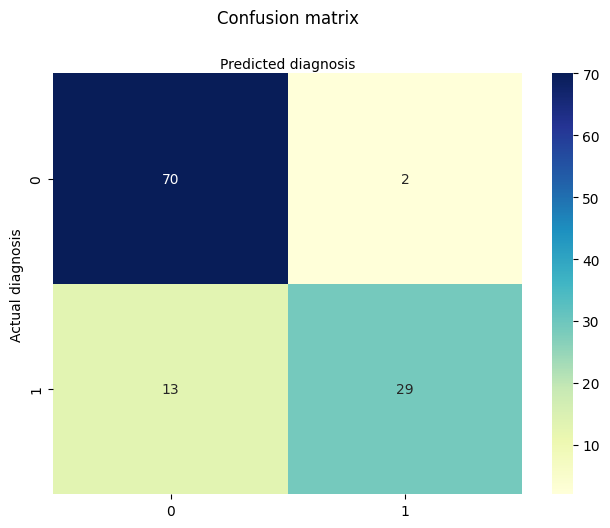

In [112]:
#@title Creating a confusion matrix. { display-mode: "form" }

# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

###Determining a Metric



Depending on the situation, we might measure success in different ways. For example, we might use:

- **Accuracy:** What portion of our predictions are right?

- **Precision:** What portion of our positive predictions are actually positive?

- **Recall:** What portion of the actual positives did we identify?



To calculate any of these, we can use the numbers from our confusion matrix:

In [ ]:
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

In [ ]:
accuracy = (tp + tn)/(tn + fp + fn + tp)
precision = (tp)/(tp + fp)
recall = tp/(tp + fn)

print ("Accuracy:", accuracy)
print ("Precision:", precision)
print ("Recall:", recall)

###Decision Trees ML


In [113]:
from sklearn import tree

class_dt = tree.DecisionTreeClassifier(max_depth=3)

class_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.25, 0.625, 'x[0] <= 89.995\ngini = 0.213\nsamples = 314\nvalue = [276, 38]'),
 Text(0.125, 0.375, 'x[0] <= 85.25\ngini = 0.108\nsamples = 263\nvalue = [248, 15]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 214\nvalue = [209, 5]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [39, 10]'),
 Text(0.375, 0.375, 'x[2] <= 19.75\ngini = 0.495\nsamples = 51\nvalue = [28, 23]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.4375, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.75, 0.625, 'x[2] <= 16.395\ngini = 0.12\nsamples = 141\nvalue = [9, 132]'),
 Text(0.625, 0.375, 'x[1] <= 17.95\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'x[0] <= 108.85\ngini = 0.031\nsamples = 129\nvalue = [2, 127

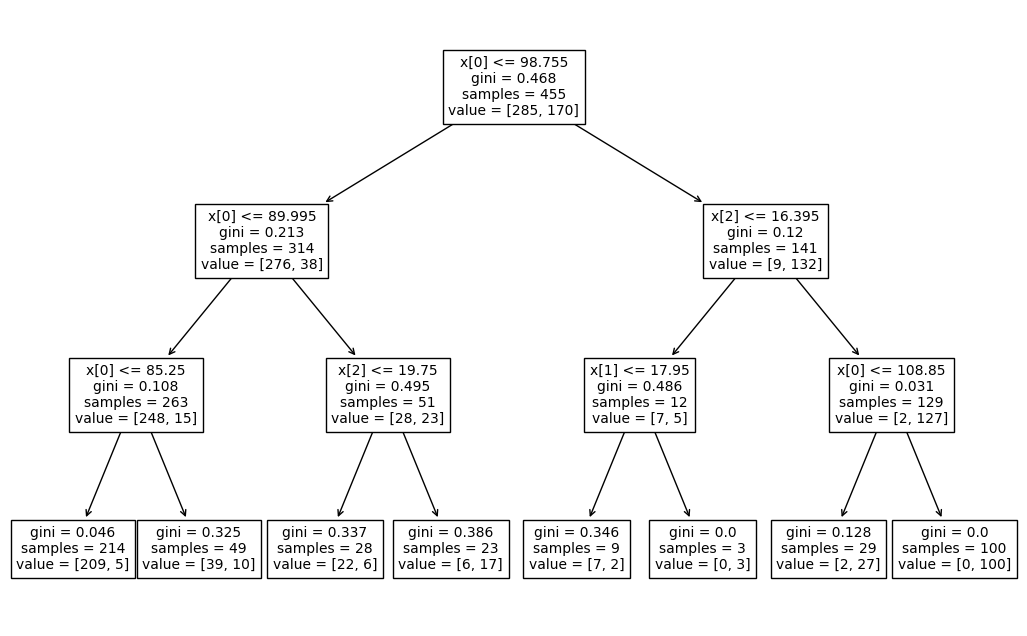

In [117]:
plt.figure(figsize=(13,8))
tree.plot_tree(class_dt, fontsize=10)

In [118]:

y_pred = class_dt.predict(X_test)

In [119]:
#@title Calculate model performance
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8596491228070176
Precision:  0.8611111111111112
Recall:  0.7380952380952381
